In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor


from sklearn.linear_model import ElasticNetCV, LinearRegression


from sklearn.metrics import mean_squared_error


from sklearn.pipeline import Pipeline


from sklearn.preprocessing import PolynomialFeatures


from xgboost import XGBRegressor



import regr_nn

In [2]:
# Load the training data
dfs_tt, dfs_ho = [], []
data_dict = {"dfs_tt": dfs_tt, "dfs_ho": dfs_ho}
for i in range(5):
    for key in data_dict:
        data_dict[key].append(
            pd.read_csv(f"preprocessing/preproc_{key.split("_")[-1]}_fold_{i}.csv")
        )

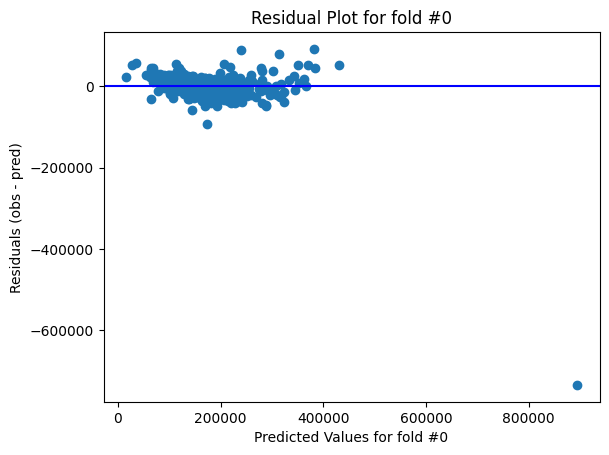

rmse for fold 0 is: 49165.37967686013


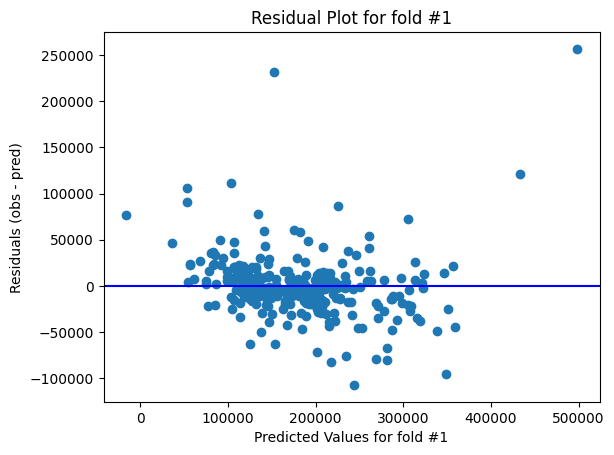

rmse for fold 1 is: 35783.644159995216


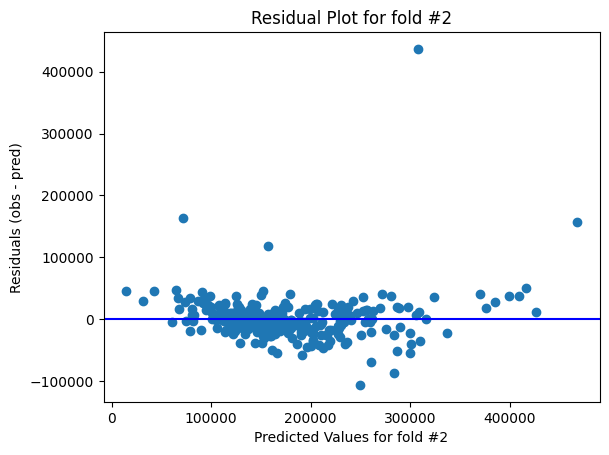

rmse for fold 2 is: 37272.81270359461


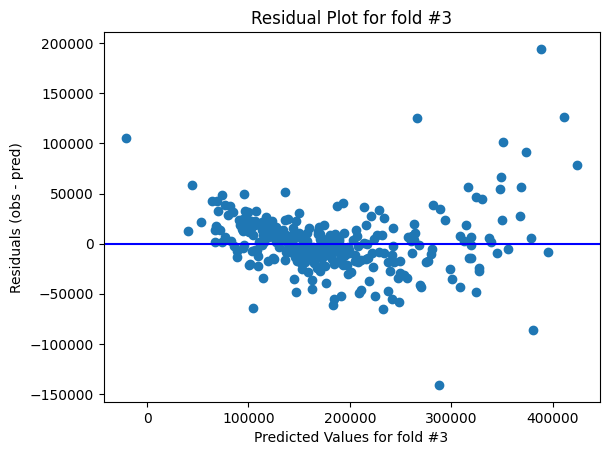

rmse for fold 3 is: 31289.49787857287


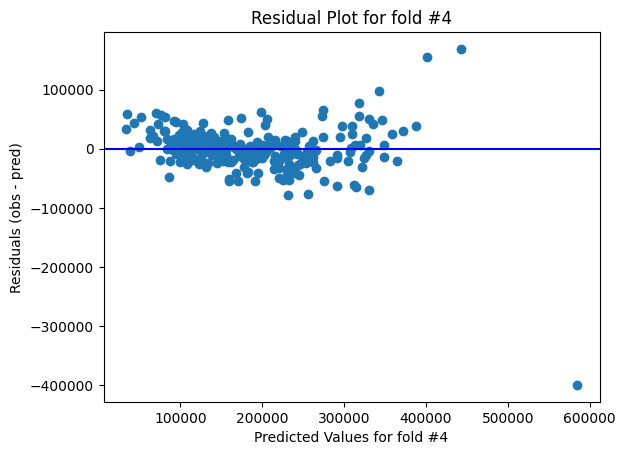

rmse for fold 4 is: 37658.92336674958


In [3]:
# Check for normality
linregr = LinearRegression()
for i in range(5):
    linregr.fit(dfs_tt[i].iloc[:, 1:-1], dfs_tt[i].iloc[:, -1])
    y_pred = linregr.predict(dfs_ho[i].iloc[:, 1:-1])
    resids = dfs_ho[i].iloc[:, -1] - y_pred

    # Create a scatter plot of residuals
    plt.scatter(y_pred, resids)
    plt.xlabel(f"Predicted Values for fold #{i}")
    plt.ylabel("Residuals (obs - pred)")
    plt.title(f"Residual Plot for fold #{i}")
    plt.axhline(y=0, color="b", linestyle="-")
    plt.show()

    # Show rmses
    print(
        f"rmse for fold {i} is: {np.sqrt(mean_squared_error(dfs_ho[i].iloc[:, -1], y_pred))}"
    )

In [4]:
# Baseline model
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
l1ratios = np.linspace(start=0, stop=1.0, num=20, endpoint=False)

baseline = Pipeline(
    [
        ("poly2", PolynomialFeatures(include_bias=False)),
        ("elasticnet", ElasticNetCV(alphas=alphas, l1_ratio=l1ratios, cv=5)),
    ]
)

In [5]:
# Ensemble learning
randomforest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
xgradboost = XGBRegressor()

# Neural network
neuralnetwork = regr_nn.RegressionNN(input_size=140, hidden_size=32, output_size=1)

In [6]:
# Test models
models = [baseline, randomforest, adaboost, xgradboost, neuralnetwork]
rmses = np.zeros((5, 5))
for i in range(5):
    j = 0
    for model in models:
        model.fit(dfs_tt[i].iloc[:, 1:-1], dfs_tt[i].iloc[:, -1])
        y_pred = model.predict(dfs_ho[i].iloc[:, 1:-1])
        rmses[i, j] = np.sqrt(mean_squared_error(dfs_ho[i].iloc[:, -1], y_pred))
        j += 1
    print(f'alpha for split {i} is: {baseline.named_steps["elasticnet"].alpha_}')
    print(f'l1ratio for split {i} is: {baseline.named_steps["elasticnet"].l1_ratio_}')

c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.836e+10, tolerance: 6.317e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.670e+10, tolerance: 6.317e+08 Linear regression models with null weight for the l1 regularization term are

alpha for split 0 is: 10000.0
l1ratio for split 0 is: 0.4


c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.438e+10, tolerance: 6.173e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.276e+10, tolerance: 6.173e+08 Linear regression models with null weight for the l1 regularization term are

alpha for split 1 is: 10000.0
l1ratio for split 1 is: 0.9500000000000001


c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.944e+10, tolerance: 6.043e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.571e+10, tolerance: 6.043e+08 Linear regression models with null weight for the l1 regularization term are

alpha for split 2 is: 10000.0
l1ratio for split 2 is: 0.0


c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.464e+10, tolerance: 5.926e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.715e+10, tolerance: 5.926e+08 Linear regression models with null weight for the l1 regularization term are

alpha for split 3 is: 10000.0
l1ratio for split 3 is: 0.8500000000000001


c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.676e+10, tolerance: 5.904e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\leyjf\Dropbox\github\HousingPrices\housing_prices_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.010e+10, tolerance: 5.904e+08 Linear regression models with null weight for the l1 regularization term are

alpha for split 4 is: 10000.0
l1ratio for split 4 is: 0.75


In [7]:
rmses

array([[106126.20625623,  31353.25568697,  35434.7656186 ,
         29720.02267854,  58422.90319868],
       [ 37543.58436082,  29659.22643776,  30484.4042935 ,
         31669.6838837 ,  75114.58094723],
       [ 62192.31168734,  31152.81369767,  38190.91709307,
         27840.61291799,  80405.7861799 ],
       [ 35086.06758268,  31649.8535233 ,  36749.40028771,
         33417.88196444,  85292.84897994],
       [ 52675.1977555 ,  34416.45624327,  38396.83596184,
         34574.73117218,  81479.86691767]])

In [8]:
rmses.mean()

np.float64(46762.00861306125)

In [9]:
# Find out which model performed the best
flat_index = np.argmin(rmses)
row_index, col_index = np.unravel_index(flat_index, rmses.shape)
print(row_index, col_index)

2 3
